In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [3]:
ls

50_Startups.csv    Elon_musk.csv                 mywt.kmw.index
BEML.csv           Elon_musk_p_n.csv             NLP-food-review.csv
Cars.csv           fig.jpg                       pima-indians-diabetes.csv
checkpoint         Fraud_check.csv               Salary_Data.csv
claimants.csv      GLAXO.csv                     Titanic.csv
Company_Data.csv   iris.csv                      ToyotaCorolla.csv
delivery_time.csv  Movie.csv                     wc-at.csv
diabetes.csv       mywt.kmw.data-00000-of-00001


In [ ]:
#Problem: Prepare a prediction model for profit of 50_startups data.
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
startUp=pd.read_csv("50_Startups.csv",encoding='cp1252')

In [6]:
startUp.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [7]:
startUp.shape

(50, 5)

In [8]:
startUp.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [10]:
data=startUp.drop(columns=["State"])#removing column with text data

In [11]:
data.shape

(50, 4)

In [12]:
x=data.iloc[:,0:3]
y=data.iloc[:,3]

In [13]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [14]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [15]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [18]:
import seaborn as sns

<Axes: >

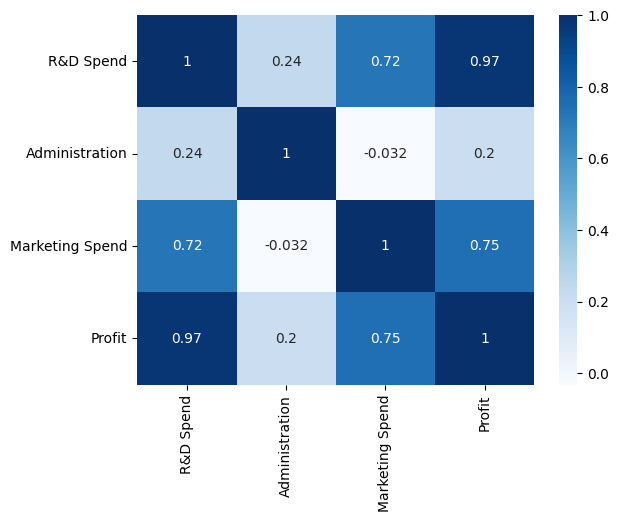

In [19]:
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.Blues)

In [20]:
import statsmodels.formula.api as smf

In [21]:
data.head(2)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [22]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [23]:
model=smf.ols('y~x',data=data).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           4.53e-30
Time:                        03:31:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x[0]           0.8057      0.045     17.846      0.000       0.715       0.897
x[1]          -0.0268      0.051     -0.526      0.602      -0.130       0.076
x[2]           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#we got accuracy of 95.1%, it is a good model

In [64]:
rsq_ms = smf.ols('data[["Marketing Spend"]]~data[["Administration"]]+data[["R&D Spend"]]',data=data).fit().rsquared
vif_ms = 1/(1-rsq_hp)

rsq_ad = smf.ols('data[["Administration"]]~data[["Marketing Spend"]]+data[["R&D Spend"]]',data=data).fit().rsquared
vif_ad = 1/(1-rsq_wt)

rsq_rd = smf.ols('data[["R&D Spend"]]~data[["Administration"]]+data[["Marketing Spend"]]',data=data).fit().rsquared
vif_rd = 1/(1-rsq_vol)

# Storing vif values in a data frame
d1 = {'Variables':['vif_ms','vif_ad','vif_rd'],'VIF':[vif_ms,vif_ad,vif_rd],'Rsquared':[rsq_ms,rsq_ad,rsq_rd]}
Vif_frame = pd.DataFrame(d1)
Vif_frame



,Variables,VIF,Rsquared
0,vif_ms,2.326773,0.570220
1,vif_ad,1.175091,0.149002
2,vif_rd,2.468903,0.594962


In [ ]:
#as vif scores are low, the variables are independent of each other

In [59]:
model1=smf.ols('np.log(y)~np.log(data[["Administration"]])+data[["Administration"]]+data[["Marketing Spend"]]+data[["R&D Spend"]]',data=data).fit()

In [60]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     35.97
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.75e-13
Time:                        04:07:33   Log-Likelihood:                 3.9026
No. Observations:                  50   AIC:                             2.195
Df Residuals:                      45   BIC:                             11.76
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           10.4990      7.397      1.419      0.163      -4.400      25.398
np.log(data[["Administration"]])     0.0323      0.703      0.046      0.964      -1.384       1.449
data[["Administration"]]          5.279e-09   6.73e-06      0.001      0.999   -1.36e-05    1.36e-05
data[["Marketing Spend"]]          3.17e-07   4.32e-07      0.735      0.466   -5.52e-07    1.19e-06
data[["R&D Spend"]]               8.126e-06   1.16e-06      7.030      0.000     5.8e-06    1.05e-05
==============================================================================
Omnibus:                       74.926   Durbin-Watson:                   0.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              946.218
Skew:                          -3.925   Prob(JB):                    3.40e-206
Kurtosis:                      22.813   Cond. No.                     6.20e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#if add non-collinearity model accuracy is decreasing
#difference between data[["x"]] and data["x"]

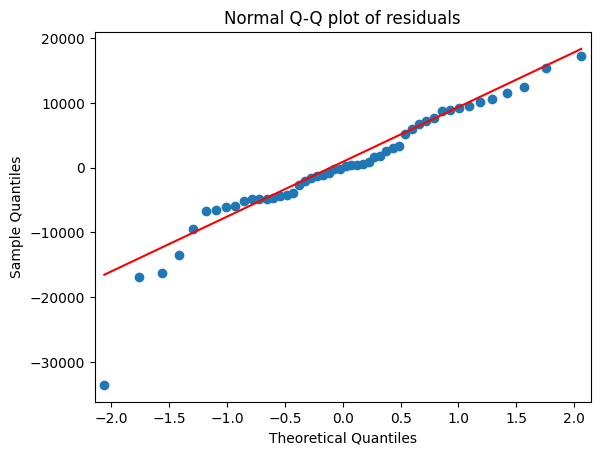

In [68]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [67]:
print(smf.ols('data[["Profit"]]~data[["Marketing Spend"]]+data[["Administration"]]+data[["R&D Spend"]]',data=data).fit().rsquared)
print(smf.ols('data[["Profit"]]~data[["Marketing Spend"]]+data[["R&D Spend"]]',data=data).fit().rsquared)
print(smf.ols('data[["Profit"]]~data[["Administration"]]+data[["R&D Spend"]]',data=data).fit().rsquared)
print(smf.ols('data[["Profit"]]~data[["R&D Spend"]]+data[["Administration"]]',data=data).fit().rsquared)


0.9507459940683246
0.9504503015559763
0.9478129385009173
0.9478129385009173


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdad703aa70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdad703afb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdad703a7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdad703b4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdad703b790>],
 'means': []}

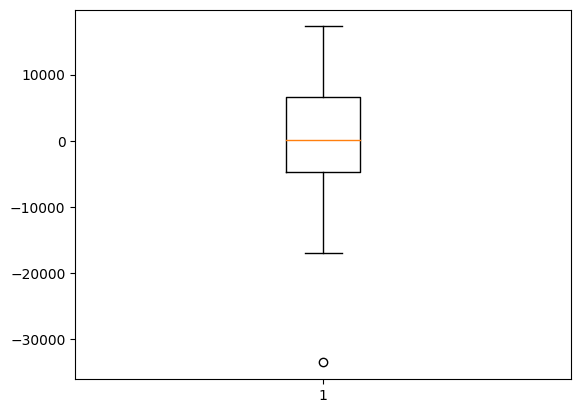

In [69]:
plt.boxplot(model.resid)

In [70]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [71]:
K=3#no of columns
N=50
3*(K+1)/N

0.24

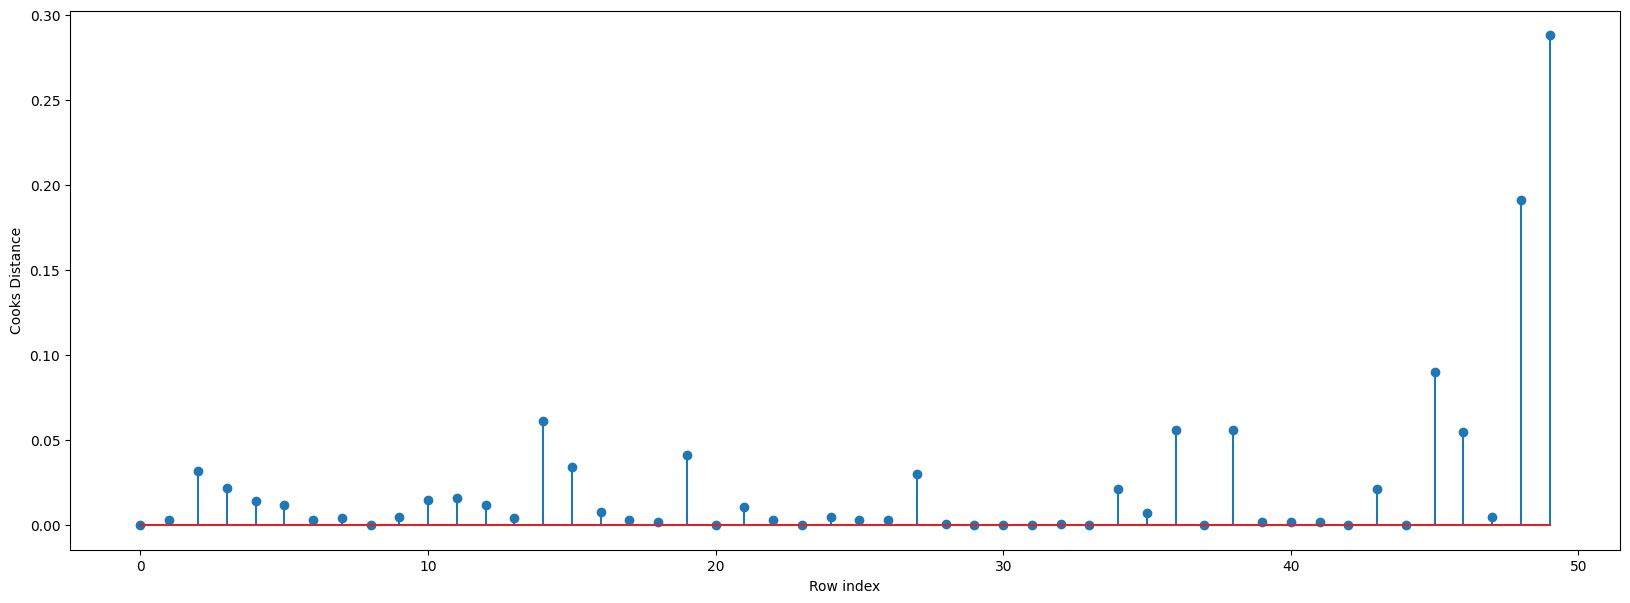

In [72]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [73]:
np.where(c>0.24)

(array([49]),)

In [87]:
data.head(2)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [76]:
data1=data.drop(data.index[[49]],axis=0).reset_index()

In [77]:
data1.shape

(49, 5)

In [79]:
data1=data1.drop(['index'],axis=1)

In [80]:
data1.shape

(49, 4)

In [83]:
data1.head(2)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [84]:
model2=smf.ols('data1[["Profit"]]~data1[["Marketing Spend"]]+data1[["Administration"]]+data1[["R&D Spend"]]',data=data1).fit()

In [85]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      data1[["Profit"]]   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           8.85e-32
Time:                        04:30:33   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
data1[["Marketing Spend"]]     0.0252      0.014      1.825      0.075      -0.003       0.053
data1[["Administration"]]     -0.0222      0.043     -0.518      0.607      -0.109       0.064
data1[["R&D Spend"]]           0.7830      0.038     20.470      0.000       0.706       0.860
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
#Accuracy of the model increased by 1% after removing the outliers which we found by cook's distance

In [88]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

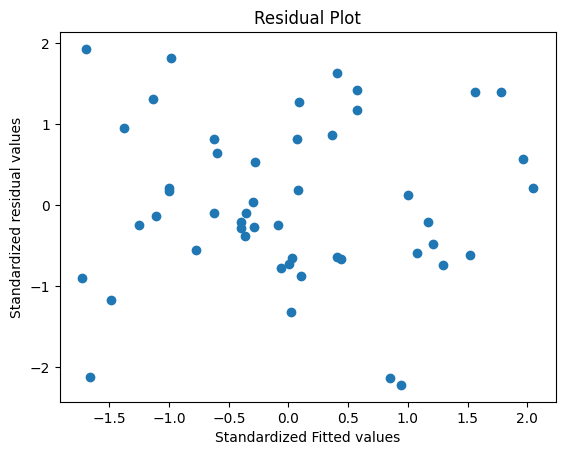

In [89]:
plt.scatter(get_standardized_values(model2.fittedvalues),
            get_standardized_values(model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [90]:
#variace is constant for error vs prediction